In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('bbc_cleaned.csv')
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "First Rows": data.head(),
    "Missing Values": data.isnull().sum().to_dict(),
}
print(data_info)

{'Shape': (2118, 2), 'Columns': ['text', 'topic'], 'Data Types': {'text': dtype('O'), 'topic': dtype('O')}, 'First Rows':                                                 text     topic
0  dallaglio man end controversy lawrence dallagl...     sport
1  best person legal job best person job appoint ...  politics
2  viewers able shape tv imagine edit titanic wat...      tech
3  fox attack blairs tory lie tony blair lie take...  politics
4  microsoft debut security tool microsoft releas...      tech, 'Missing Values': {'text': 0, 'topic': 0}}


2.1 Factorization

First, let's factorize the "topic" column -

In [35]:
data['topic_id'] = data.topic.factorize()[0]
print(data.head())
print(data.shape)

                                                text     topic  topic_id
0  dallaglio man end controversy lawrence dallagl...     sport         0
1  best person legal job best person job appoint ...  politics         1
2  viewers able shape tv imagine edit titanic wat...      tech         2
3  fox attack blairs tory lie tony blair lie take...  politics         1
4  microsoft debut security tool microsoft releas...      tech         2
(2118, 3)


We will now take a look at how the Product topics are mapped and then also create couple dictionaries from the same for future reference (mapping topics to factors and vice-versa) -

In [36]:
topic_id_df = data[['topic', 'topic_id']].drop_duplicates().sort_values(by = 'topic_id').reset_index(drop = 1)
print(topic_id_df)

           topic  topic_id
0          sport         0
1       politics         1
2           tech         2
3       business         3
4  entertainment         4


In [37]:
# # Find duplicate rows
# # Tìm các dòng trùng lặp dựa trên cột 'text'
# duplicate_rows = data[data.duplicated(subset=['text'], keep=False)]

# # Hiển thị các nhóm dữ liệu trùng
# grouped_duplicates = duplicate_rows.sort_values(by=['text']).groupby('text')
# for group, rows in grouped_duplicates:
#     print(f"Duplicate group: {group}")
#     print(rows)


# # Drop duplicate rows and reset the index
# data_cleaned = data.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)

# print(data_cleaned)
# duplicate_rows, data_cleaned.shape

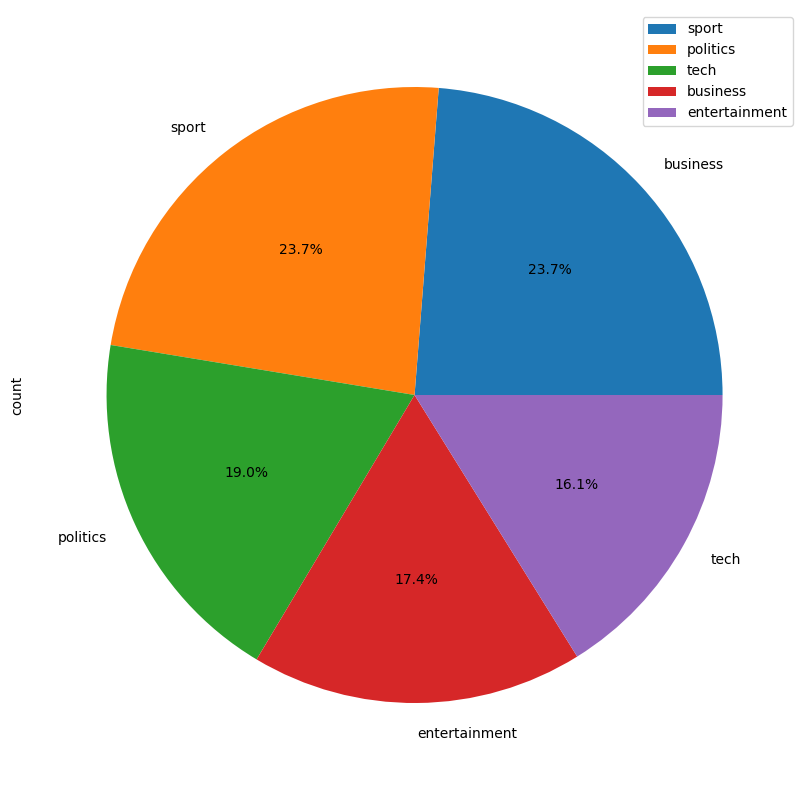

In [38]:
list_topic = data["topic"].unique()
data["topic"].value_counts().plot(kind = 'pie',figsize = (10, 10), autopct = '%1.1f%%', shadow = False)

plt.legend(list_topic)
plt.show()

Distribution of Data

C:\Users\nthuy\AppData\Local\Temp\ipykernel_11748\3662893941.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')


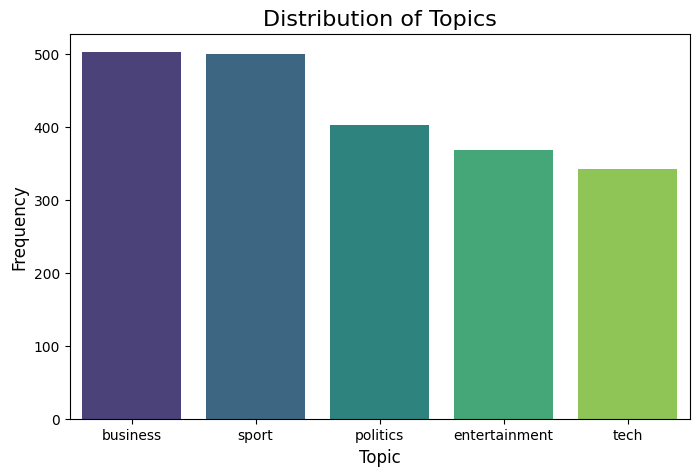

Phân phối các chủ đề:
topic
business         503
sport            501
politics         403
entertainment    369
tech             342
Name: count, dtype: int64
Duplicates:  0


In [39]:
import seaborn as sns

# Step 1: Distribution of Topics
topic_counts = data['topic'].value_counts()

# Bar chart for topic distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.title('Distribution of Topics', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# In số liệu phân phối các chủ đề
print("Phân phối các chủ đề:")
print(topic_counts)

# Step 2: Check for Duplicates
duplicates = data.duplicated(subset=['text'], keep=False).sum()

# Output number of duplicates for reference
print("Duplicates: ", duplicates)


2. Word Cloud

Now, let's build a topico demonstrate which are the most frequent terms for each of the categories. This will give us a brief idea if there are any frequent words that separate our data up to some extent.

In [40]:
data.topic.unique()

array(['sport', 'politics', 'tech', 'business', 'entertainment'],
      dtype=object)

In [41]:
tech = ' '.join(list(data.text[data.topic == 'tech']))
business = ' '.join(list(data.text[data.topic == 'business']))
sport = ' '.join(list(data.text[data.topic == 'sport']))
entertainment = ' '.join(list(data.text[data.topic == 'entertainment']))
politics = ' '.join(list(data.text[data.topic == 'politics']))

print(tech)
print(business)
print(sport)
print(entertainment)
print(politics)


viewers able shape tv imagine edit titanic watch just favourite bits cut slushier moments star war leave bare bone action-fest manipulate favourite film make personalise movie just begin ambitious new 75m euro â£51m project fund european union new media new millennium nm2 endgame development completely new media genre allow audiences create media worlds base specific interest taste viewers able participate storylines manipulate plot set prop tv show bt 13 partner involve project contribute software originally design spot anomalies cctv picture software use content recognition algorithms three-year project work seven productions develop set software tool allow viewers edit content need productions experimental television plot drive text message tv audience participants text select word impact character drama interact develop finland show finnish tv audiences team work bbcs big budget drama mervyn peak gothic fantasy gormenghast re-engineered allow people choose variety edit versions bbc

Word Cloud by Topic

In [42]:
from wordcloud import WordCloud

def wordcloud(text, title):
    wordcloud = WordCloud(
        width = 1600,
        height = 1000,
        background_color = "black",
        min_font_size = 10
    ).generate(text)

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title("Word Cloud for " + title + " Articles\n", fontsize = 20)
    plt.axis("off")
    plt.show()

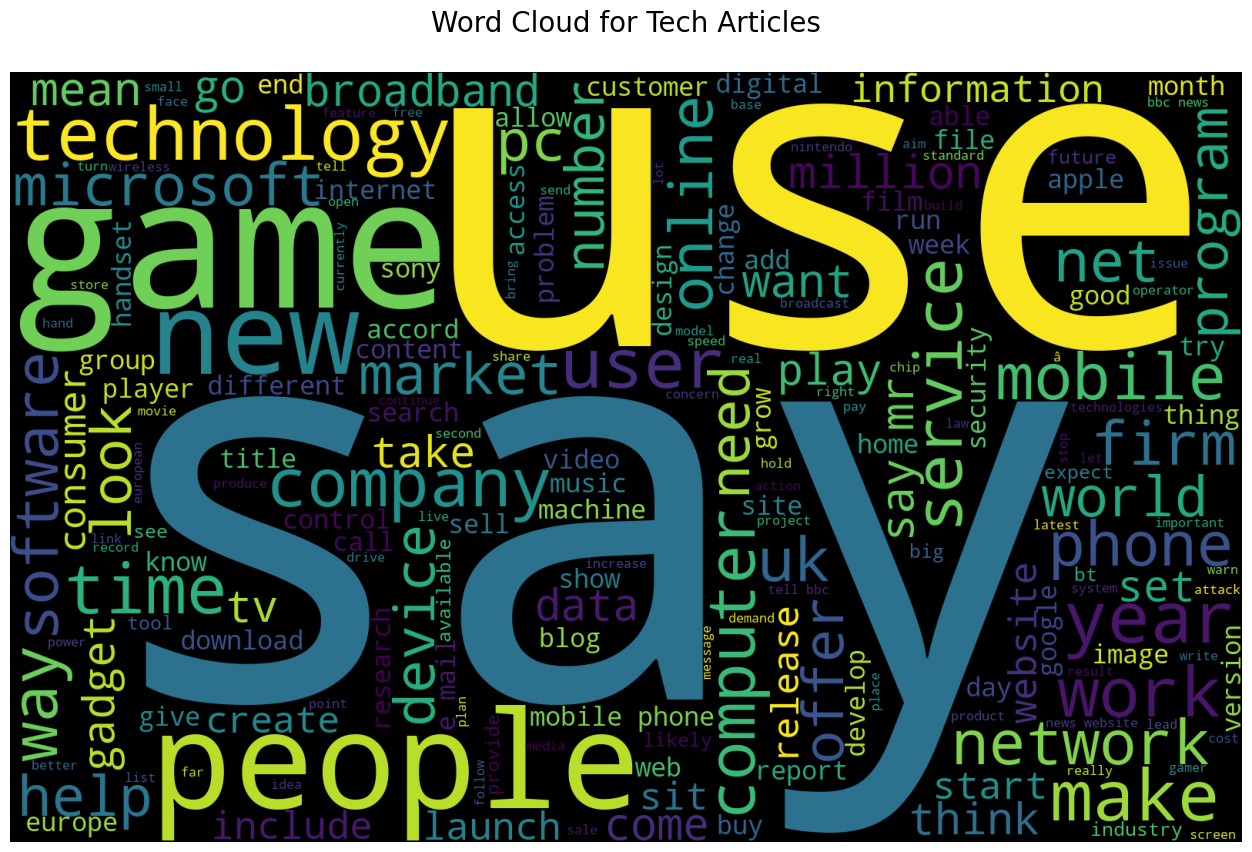

In [43]:
wordcloud(tech, "Tech")

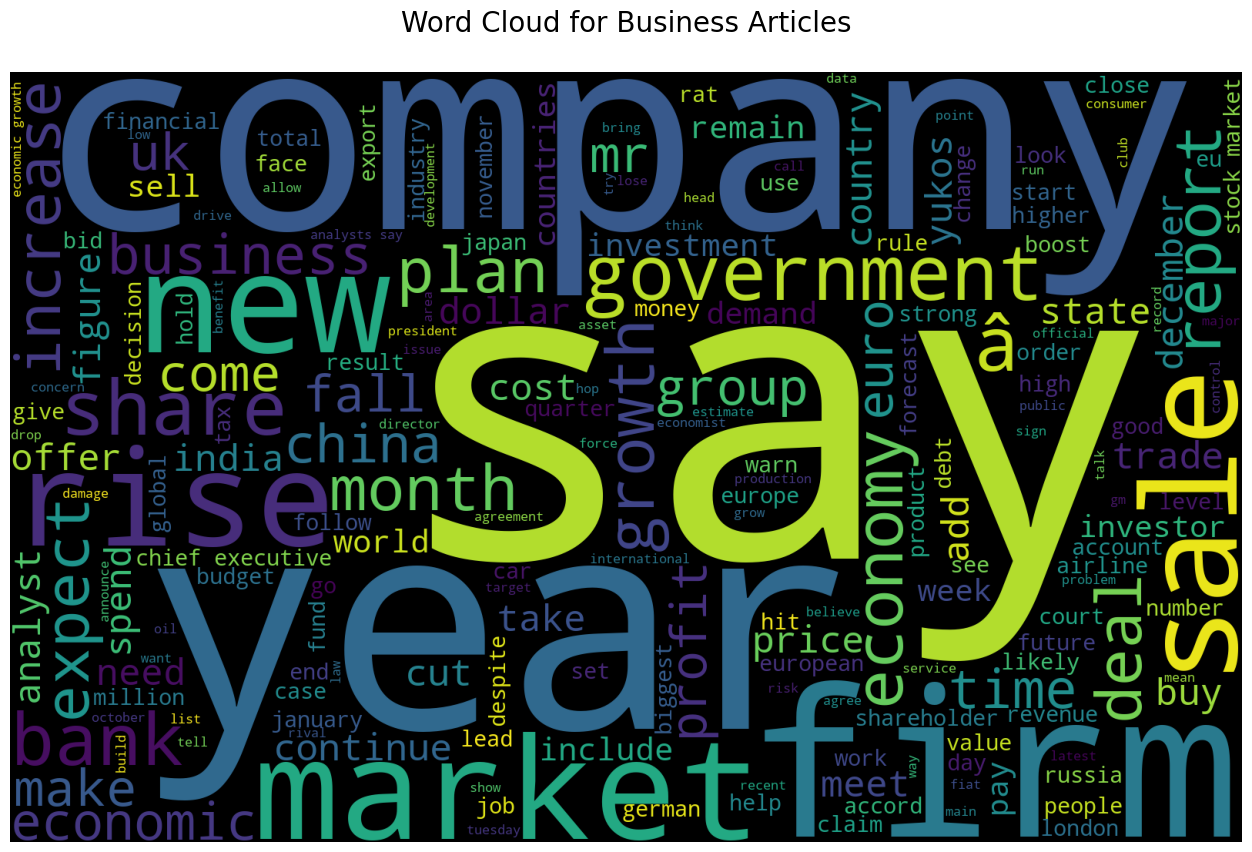

In [44]:
wordcloud(business, "Business")

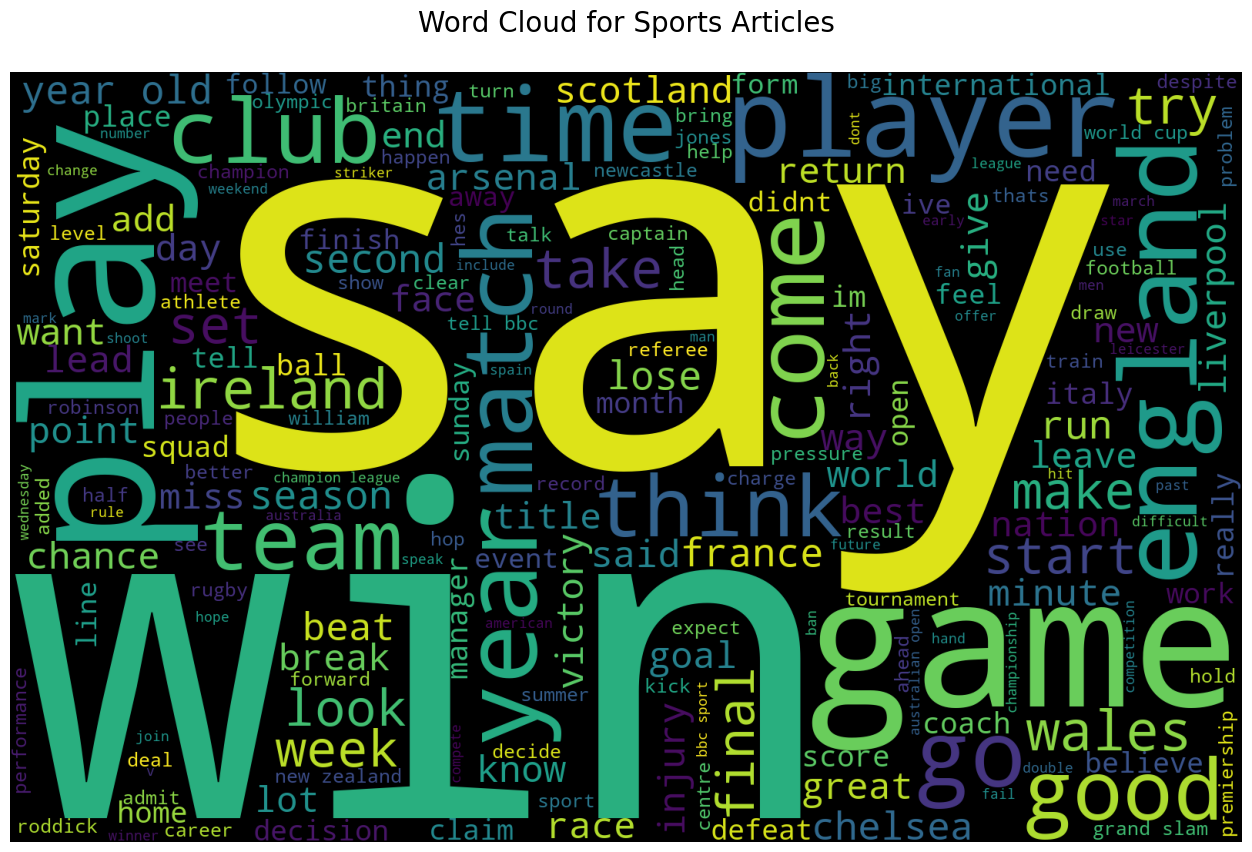

In [45]:
wordcloud(sport, "Sports")

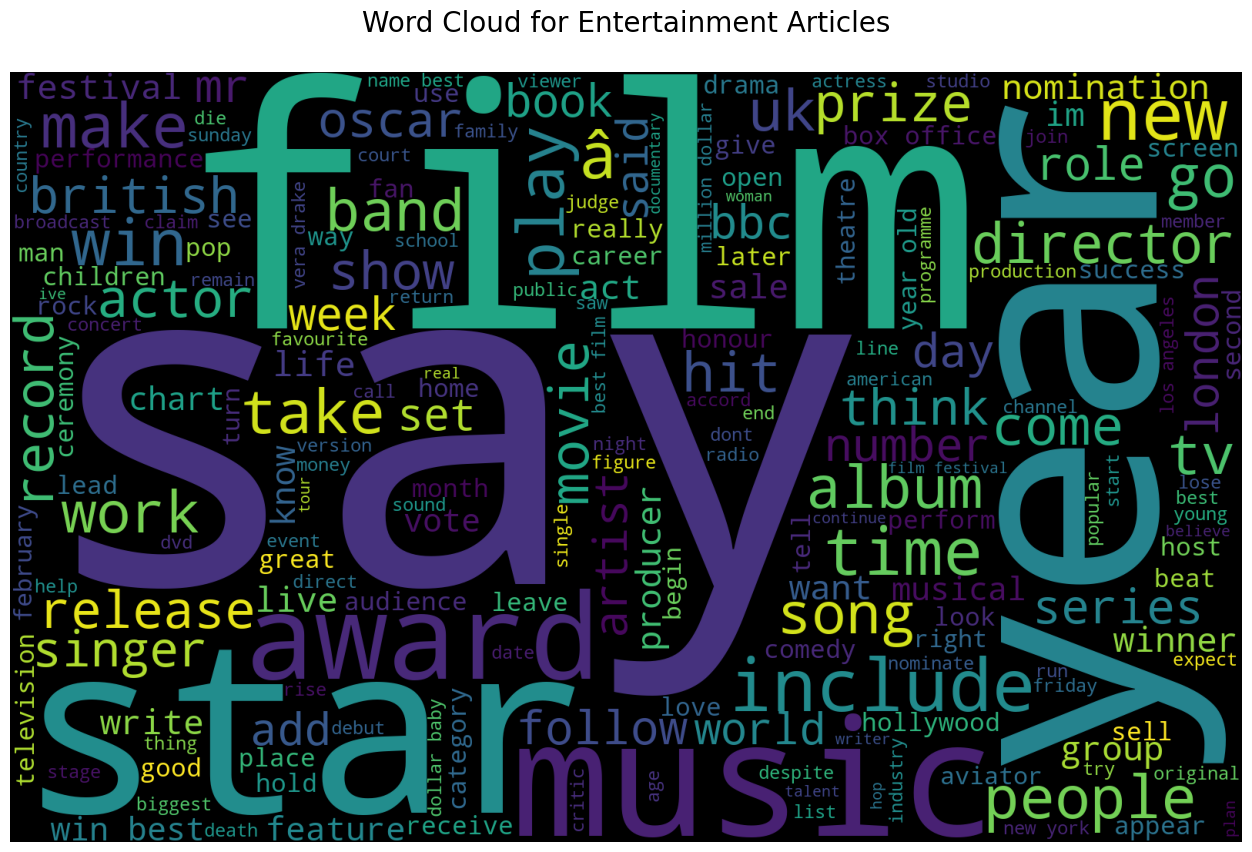

In [46]:
wordcloud(entertainment, "Entertainment")

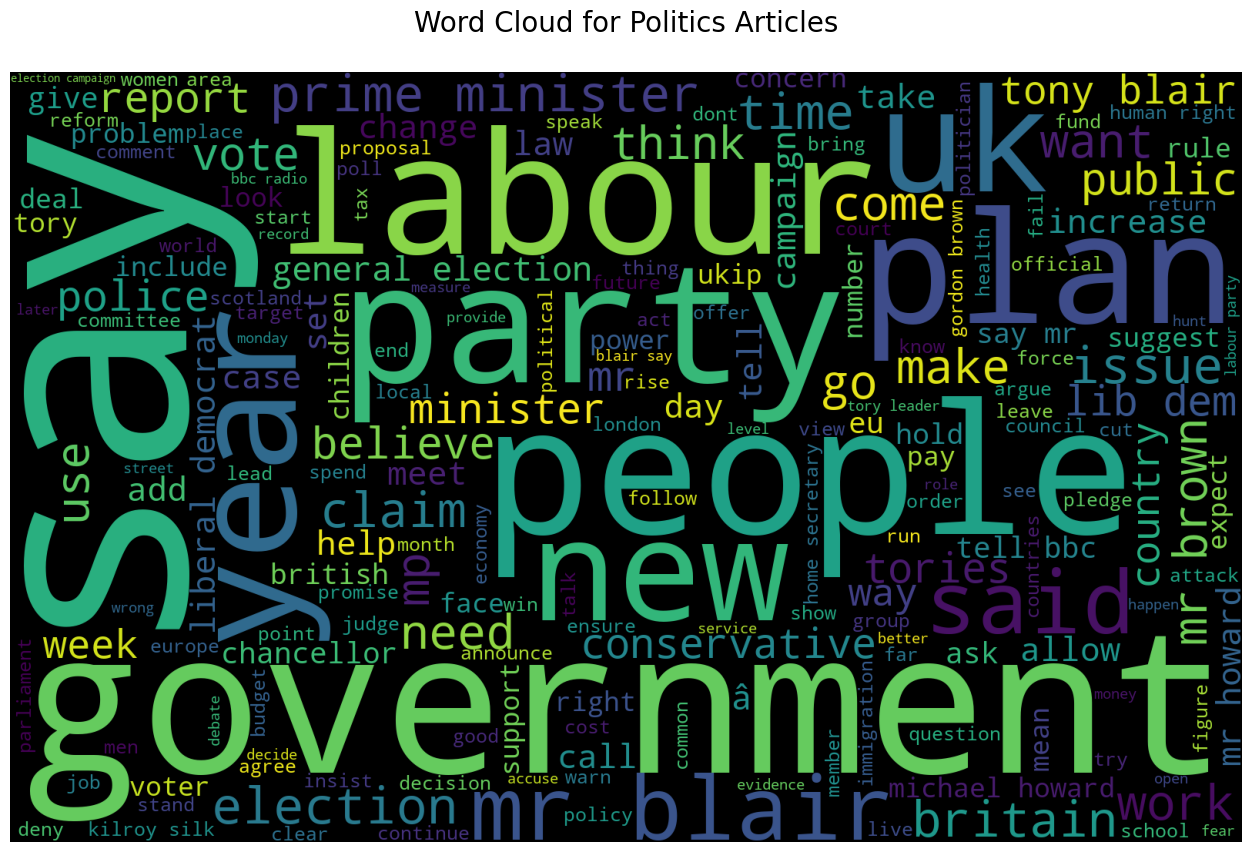

In [47]:
wordcloud(politics, "Politics")

From all of the above word clouds, we make the following observations -
* The word **say** is very frequent in each of the articles In fact it is most frequent in almost every topic of article.
* For **tech** related articles, the words like ***people, technology, computer, software*** are frequent.
* For **business** related articles, the words like ***market, growth, company, firm*** are frequent.
* For **sport** related articles, the words like ***game, match, player, team, win*** are frequent.
* For **entertainment** related articles, the words like ***film, show, music, award, band*** are frequent.
* For **politics** related articles, the words like ***people, plan, labour, government*** are frequent.
One thing that might worry us is that the word said is too prevalent in the entire dataset and could lead to some sort of bias. We can be pretty certain that there might not be the case. Why? Because the word is just too prevalent and hence a poor separator of our data. We will verify this in the next step when we will take a look at some of the most relevant words/terms to each of our categories.

For that purpose, we will adapt a very beautfully written code by Susan Li in this article.

What we will be doing is using chi-squared test to identify the 2 unigrams and bigrams each that are most relevant to each of the categories. For conducting a chi-squared test, we will need to vectorize our text data first so let's get to it.
P.S. I have written a more detailed explanation for the above mentioned code for easy understanding below.

2.4 Feature Engineering

When it comes to text data and text analytics in general, feature engineering is converting text data into features which can be used by algorithms i.e. converting text into meaningful numbers.
There are many methods to achieve that viz. Tokenization, Vectorization, etc.
We will make use of TF-IDF (Term Frequency, Inverse Document Frequency) vectorization to generate features out of our data i.e. the complaints.
tf-idf vectorization is a technique in which each term in a document and hence the corpus is assigned a weight based on it's frequency. It has two terms.
Term Frequency - This measures the term frequency for each document.

TF = (number of times term e appears in the document) / (total number of words in the document)

Inverse Document Frequency - This measures how important a term is w.r.t. the entire corpus. TF considers all terms equal hence terms which are more frequent like "is", "was", etc. will have a higher TF than more important, but rarer, words like "hazardous", "experiment", etc. IDF scales such rare words up and scales the more frequent words down so as to balance them both.

IDF = ln(number of total documents / number of documents having the term e)

We then calculate the TF-IDF by simply multiplying both the terms above -
TF-IDF = TF x IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(
    ngram_range=(1, 2), 
    stop_words="english",
    max_features=100
)

features = tf_idf.fit_transform(data.text).toarray()
features.shape

(2118, 100)

The number of features generated using tf-idf without using the max_features argument are almost 370,000 which seems like an overkill for such a small dataset.
We will instead use the feature available in the tf-idf transformer to select the top n number of features instead.
We will hence select the top 100 features.

In [49]:
features[:5, :5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.15272732, 0.        , 0.        , 0.08265339],
       [0.        , 0.        , 0.        , 0.        , 0.10525074],
       [0.14854296, 0.        , 0.        , 0.        , 0.        ]])

Now that we have our features, let's use that code by Susan to get our 2 most relevant (correlated) unigrams and bigrams for each topic.

In [50]:
import numpy as np
from sklearn.feature_selection import chi2

# Tạo topic_id từ dữ liệu
data['topic_id'] = data['topic'].factorize()[0]
labels = data['topic_id'].to_numpy()

# Tạo topic_id_df
topic_id_df = {topic: idx for idx, topic in enumerate(data['topic'].unique())}

print(topic_id_df)

# Chọn số lượng N đặc trưng
N = 2

for topic, topic_id in sorted(topic_id_df.items()):
    # Tính toán giá trị chi2
    features_chi2 = chi2(features, labels == topic_id)
    indices = np.argsort(features_chi2[0])  # Sắp xếp theo giá trị chi2
    feature_names = np.array(tf_idf.get_feature_names_out())[indices]  # Lấy tên đặc trưng
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]  # Unigrams
    print(f"# '{topic}':")
    print(f"  . Most correlated unigrams:\n. {'\n. '.join(unigrams[-N:])}")




{'sport': 0, 'politics': 1, 'tech': 2, 'business': 3, 'entertainment': 4}
# 'business':
  . Most correlated unigrams:
. price
. bank
# 'entertainment':
  . Most correlated unigrams:
. award
. film
# 'politics':
  . Most correlated unigrams:
. party
. labour
# 'sport':
  . Most correlated unigrams:
. play
. win
# 'tech':
  . Most correlated unigrams:
. use
. technology


> * Going through the features above, we can see that almost all of them make a lot of sense. 
> * Also, no mentions of the word **"say"** as discussed above.